In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.
In this notebook, you will load historical Canadian Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

<AxesSubplot:title={'center':'CAD-JPY Price Series 1990-2020'}, xlabel='Date'>

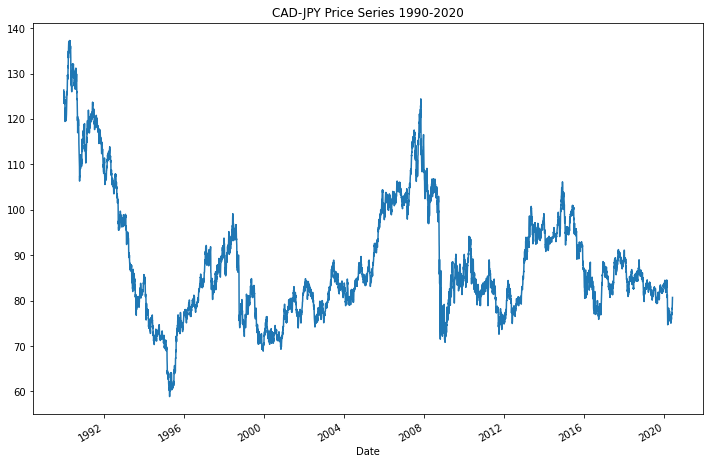

In [4]:
# Plot just the "Price" column from the dataframe:

cad_jpy_df.Price.plot(figsize =(12,8), title = "CAD-JPY Price Series 1990-2020")

**Question:** Do you see any patterns, long-term and/or short? 

**Answer:** YOUR ANSWER HERE

---

There is a dramatic downward pattern in the beginning 1990 until aprox 1995. During the period between 1996 and 2016, we see a long-term bullish-to-bearish trend reversal. In terms of short-term patterns, there are not that many clusters of volatile periods throughout the whole timeline. 

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the exchange rate price into trend and noise.

In [5]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:

cad_jpy_noise, cad_jpy_trend = sm.tsa.filters.hpfilter(cad_jpy_df["Price"])

In [9]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
trend_df = cad_jpy_trend.to_frame(name="Price_Trend")
noise_df = cad_jpy_noise.to_frame(name="Price_Noise")
price_df = cad_jpy_df.drop(axis =1, columns = ["Open", "High", "Low"])
cad_jpy_concatenated =pd.concat([price_df, trend_df,noise_df], axis=1)
cad_jpy_concatenated.head()


,Price,Price_Trend,Price_Noise
Date,,,
1990-01-02,126.37,125.850905,0.519095
1990-01-03,125.30,125.679684,-0.379684
1990-01-04,123.46,125.508788,-2.048788
1990-01-05,124.54,125.338304,-0.798304
1990-01-08,124.27,125.167037,-0.897037


<AxesSubplot:title={'center':'CAD-JPY Price vs. Trend Series 2015-2020'}, xlabel='Date'>

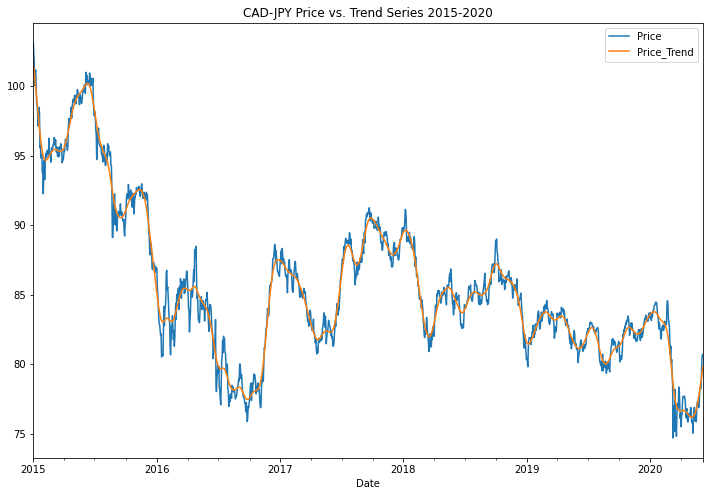

In [10]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
trend_2015_present = cad_jpy_concatenated['2015-01':].drop(axis =1, columns = ["Price_Noise"])
trend_2015_present.plot(figsize=(12,8), title ="CAD-JPY Price vs. Trend Series 2015-2020")

**Question:** Do you see any patterns, long-term and/or short?

**Answer:** YOUR ANSWER HERE

There is a downward trend from 2015 to 2017 as well as head and shoulders pattern between 2017 and 2019. There is another downward trend in the early 2020 with a slight upward motion close to the middle of 2020. In terms of short term, there are many cases of bullish-to-bearish trend reversal throught the timeline. The difference in shape in movements between the the price and price trends portrays presense of a lot of noise in the dataset, see below. 

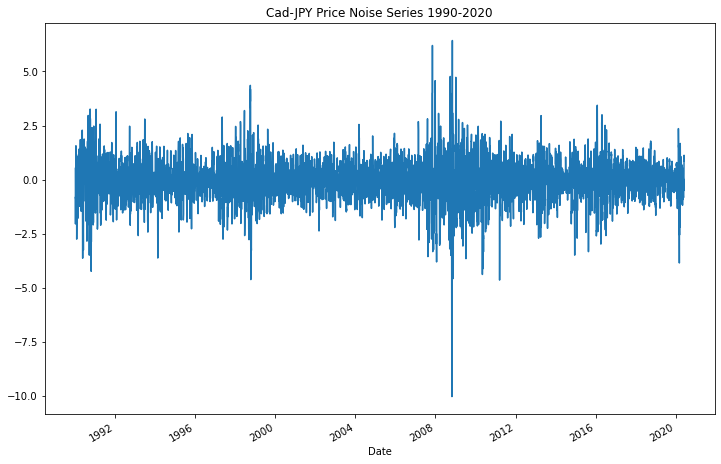

In [11]:
# Plot the Settle Noise
noise_plot = cad_jpy_concatenated["Price_Noise"].plot(figsize =(12,8), title = "Cad-JPY Price Noise Series 1990-2020")

---

# Forecasting Returns using an ARMA Model

Using exchange rate *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [12]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [16]:
import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARMA

In [17]:
# Estimate and ARMA model using statsmodels (use order=(2, 1))
arma_model = ARMA(returns.values, order = (2,1))

# Fit the model and assign it to a variable called results
arma_results = arma_model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23010D+00    |proj g|=  3.45590D-04

At iterate    5    f=  1.23010D+00    |proj g|=  3.60600D-05

At iterate   10    f=  1.23010D+00    |proj g|=  3.49720D-04

At iterate   15    f=  1.23008D+00    |proj g|=  2.19582D-03

At iterate   20    f=  1.23007D+00    |proj g|=  1.62981D-05

At iterate   25    f=  1.23007D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     34      1     0     0   

In [18]:
# Output model summary results:
arma_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7928
Model:                     ARMA(2, 1)   Log Likelihood               -9751.978
Method:                       css-mle   S.D. of innovations              0.828
Date:                Mon, 25 Apr 2022   AIC                          19513.955
Time:                        17:08:21   BIC                          19548.846
Sample:                             0   HQIC                         19525.903
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.009     -0.245      0.807      -0.020       0.016
ar.L1.y       -0.8547      0.164     -5.200      0.000      -1.177      -0.533
ar.L2.y       -0.0197      0.013     -1.475      0.140      -0.046       0.006
ma.L1.y        0.8246      0.164      5.030      0.000       0.503       1.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2033           +0.0000j            1.2033            0.5000
AR.2          -42.1697           +0.0000j           42.1697            0.5000
MA.1           -1.2127           +0.0000j            1.2127            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'ARMA CAD-JPY 5-day Return Forecast'}>

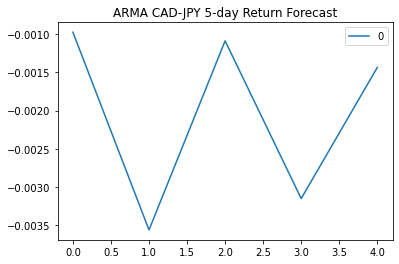

In [20]:
# Plot the 5 Day Returns Forecast
pd.DataFrame(arma_results.forecast(steps=5)[0]).plot(title = "ARMA CAD-JPY 5-day Return Forecast")

**Question:** Based on the p-value, is the model a good fit?

**Answer:** The p-value benchmark for stratigical significance is 0.05 or lower. The model is not reliable since two out of four p-values are higher than this particular threshold. 

---

# Forecasting the Exchange Rate Price using an ARIMA Model

 1. Using the *raw* CAD/JPY exchange rate price, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Plot a 5 day forecast for the Exchange Rate Price. What does the model forecast predict will happen to the Japanese Yen in the near term?

In [21]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
arima_model = ARIMA(cad_jpy_df["Price"], order = (5,1,1))

# Fit the model
arima_results = arima_model.fit()

/Users/dariamerkulenko/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/dariamerkulenko/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10313D+00    |proj g|=  1.92957D-04

At iterate    5    f=  1.10313D+00    |proj g|=  5.81757D-06

At iterate   10    f=  1.10313D+00    |proj g|=  3.34621D-05

At iterate   15    f=  1.10313D+00    |proj g|=  4.68736D-05

At iterate   20    f=  1.10313D+00    |proj g|=  4.66294D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     28      1     0     0   4.441D-08   1.103D+00
  F =   1.1031309576181281     

CONVERG

In [22]:
# Output model summary results:
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 7928
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.622
Method:                       css-mle   S.D. of innovations              0.729
Date:                Mon, 25 Apr 2022   AIC                          17507.244
Time:                        17:13:27   BIC                          17563.070
Sample:                             1   HQIC                         17526.361
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0058      0.008     -0.743      0.458      -0.021       0.009
ar.L1.D.Price     0.4287      0.246      1.740      0.082      -0.054       0.912
ar.L2.D.Price     0.0177      0.014      1.264      0.206      -0.010       0.045
ar.L3.D.Price    -0.0118      0.012     -0.959      0.337      -0.036       0.012
ar.L4.D.Price     0.0110      0.012      0.879      0.379      -0.013       0.035
ar.L5.D.Price    -0.0191      0.011     -1.702      0.089      -0.041       0.003
ma.L1.D.Price    -0.4568      0.246     -1.856      0.064      -0.939       0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7660           -0.7702j            1.9266           -0.0655
AR.2            1.7660           +0.7702j            1.9266            0.0655
AR.3           -2.3649           -0.0000j            2.3649           -0.5000
AR.4           -0.2974           -2.4212j            2.4394           -0.2695
AR.5           -0.2974           +2.4212j            2.4394            0.2695
MA.1            2.1893           +0.0000j            2.1893            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'ARIMA CAD-JPY 5-day Return Forecast'}>

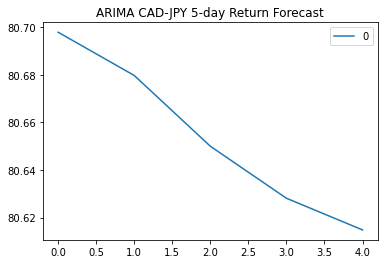

In [23]:
# Plot the 5 Day Price Forecast
pd.DataFrame(arima_results.forecast(steps=5)[0]).plot(title = "ARIMA CAD-JPY 5-day Return Forecast")

**Question:** What does the model forecast will happen to the Japanese Yen in the near term?

**Answer:** The forecast shows a steady downward motion in price in the near term.

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen exchange rate returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using exchange rate *Returns*, estimate a GARCH model. **Hint:** You can reuse the `returns` variable from the ARMA model section.

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [24]:
import arch as arch

In [25]:
from arch import arch_model

In [28]:
# Estimate a GARCH model:
garch_model =arch_model(returns, mean = "Zero", vol = "GARCH", p =2, q = 1)

# Fit the model
garch_results = garch_model.fit(disp='off')

In [29]:
# Summarize the model results
garch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Mon, Apr 25 2022   Df Residuals:                     7928
Time:                        17:16:49   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

**Note:** Our p-values for GARCH and volatility forecasts tend to be much lower than our ARMA/ARIMA return and price forecasts. In particular, here we have all p-values of less than 0.05, except for alpha(2), indicating overall a much better model performance. In practice, in financial markets, it's easier to forecast volatility than it is to forecast returns or prices. (After all, if we could very easily predict returns, we'd all be rich!)

In [30]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [31]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
forecasts = results.forecast(start = '2020-06-04', horizon = forecast_horizon)

In [32]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566029,12.573718,12.581301,12.588778,12.596153


In [34]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566029
h.2,12.573718
h.3,12.581301
h.4,12.588778
h.5,12.596153


<AxesSubplot:title={'center':'CAD-JPY 5 Day Volatility Forecast'}>

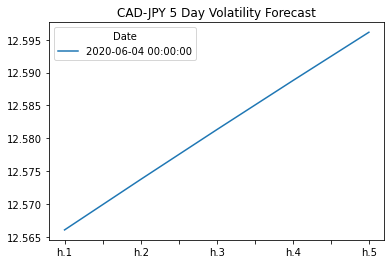

In [35]:
# Plot the final forecast
final.plot(title="CAD-JPY 5 Day Volatility Forecast")

**Question:** What does the model forecast will happen to volatility in the near term?

**Answer:** The model an increase in volatility in the near term. 

---

# Conclusions

1. Based on your time series analysis, would you buy the yen now?

I wouldnt recommend bying Yen now. ARIMA and ARMA were seen as not reliable. Whereas GARCH predicts high volatility, which portrays high risks.  

2. Is the risk of the yen expected to increase or decrease?

The risk of Yen is expected to increase according to GARCH model, where it shows increasing volatility. 

3. Based on the model evaluation, would you feel confident in using these models for trading?

I wouldnt feel confident using ARMA and ARIMA models due to its proven unrealability. On the other hand, GARCH model shows promise since it's three out of four p-values show high statistical stability. For volatility testing, I would efinitely use GARCH model. 